# Bayesian Regression Modeling

In this notebook, I will attempt a first shot at ml on the GOOG dataset to check for performance. Since I have already transformed the data, all I need to do is load it into python, prepare it for machine learning, and then fit the model. 

#### <u>Steps</u>

1) Load pickle  
2) create target (['pct_change'].shift(-1))  
3) drop unnessary cols / check for data leakage   
4) setup X and y  
5) train test split  
6) instantiate and fit model  
7) test model  

In [10]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)

df = pd.read_pickle('./data/GOOG081320.pickle')
df.head()

,open,high,low,close,volume,date,SYMBOL,prev_close,diff_1,pct_change,log_return,pct_return_0,pct_return_1,pct_return_2,pct_return_3,pct_return_4,pct_return_5,pct_return_6,pct_return_7,pct_return_8,pct_return_9,pct_return_10,pct_return_11,pct_return_12,pct_return_13,pct_return_14,pct_return_15,pct_return_16,pct_return_17,pct_return_18,pct_return_19,pct_return_20,pct_return_21,pct_return_22,pct_return_23,pct_return_24,pct_return_25,pct_return_26,pct_return_27,pct_return_28,pct_return_29,pct_return_30,intervals,"monthly_(-0.12, -0.11499999999999999]","monthly_(-0.11499999999999999, -0.10999999999999999]","monthly_(-0.10999999999999999, -0.105]","monthly_(-0.105, -0.09999999999999999]","monthly_(-0.09999999999999999, -0.09499999999999999]","monthly_(-0.09499999999999999, -0.09]","monthly_(-0.09, -0.08499999999999999]","monthly_(-0.08499999999999999, -0.07999999999999999]","monthly_(-0.07999999999999999, -0.07499999999999998]","monthly_(-0.07499999999999998, -0.06999999999999998]","monthly_(-0.06999999999999998, -0.06499999999999999]","monthly_(-0.06499999999999999, -0.059999999999999984]","monthly_(-0.059999999999999984, -0.05499999999999998]","monthly_(-0.05499999999999998, -0.04999999999999999]","monthly_(-0.04999999999999999, -0.044999999999999984]","monthly_(-0.044999999999999984, -0.03999999999999998]","monthly_(-0.03999999999999998, -0.034999999999999976]","monthly_(-0.034999999999999976, -0.02999999999999997]","monthly_(-0.02999999999999997, -0.02499999999999998]","monthly_(-0.02499999999999998, -0.019999999999999976]","monthly_(-0.019999999999999976, -0.014999999999999972]","monthly_(-0.014999999999999972, -0.009999999999999981]","monthly_(-0.009999999999999981, -0.004999999999999977]","monthly_(-0.004999999999999977, 2.7755575615628914e-17]","monthly_(2.7755575615628914e-17, 0.005000000000000032]","monthly_(0.005000000000000032, 0.010000000000000037]","monthly_(0.010000000000000037, 0.015000000000000041]","monthly_(0.015000000000000041, 0.020000000000000018]","monthly_(0.020000000000000018, 0.025000000000000022]","monthly_(0.025000000000000022, 0.030000000000000027]","monthly_(0.030000000000000027, 0.03500000000000003]","monthly_(0.03500000000000003, 0.040000000000000036]","monthly_(0.040000000000000036, 0.04500000000000004]","monthly_(0.04500000000000004, 0.050000000000000044]","monthly_(0.050000000000000044, 0.05500000000000005]","monthly_(0.05500000000000005, 0.06000000000000005]","monthly_(0.06000000000000005, 0.06500000000000003]","monthly_(0.06500000000000003, 0.07000000000000003]","monthly_(0.07000000000000003, 0.07500000000000004]","monthly_(0.07500000000000004, 0.08000000000000004]","monthly_(0.08000000000000004, 0.08500000000000005]","monthly_(0.08500000000000005, 0.09000000000000005]","monthly_(0.09000000000000005, 0.09500000000000006]","monthly_(0.09500000000000006, 0.10000000000000003]","monthly_(0.10000000000000003, 0.10500000000000004]","monthly_(0.10500000000000004, 0.11000000000000004]","monthly_(0.11000000000000004, 0.11500000000000005]","monthly_(0.11500000000000005, 0.12000000000000005]","monthly_(0.12000000000000005, 0.12500000000000006]","monthly_(0.12500000000000006, 0.13000000000000006]","monthly_(0.13000000000000006, 0.13500000000000006]","monthly_(0.13500000000000006, 0.14000000000000007]","monthly_(0.14000000000000007, 0.14500000000000007]","monthly_(0.14500000000000007, 0.15000000000000008]","monthly_(0.15000000000000008, 0.15500000000000008]","monthly_(0.15500000000000008, 0.16000000000000003]","monthly_(0.16000000000000003, 0.16500000000000004]","monthly_(0.16500000000000004, 0.17000000000000004]","monthly_(0.17000000000000004, 0.17500000000000004]","monthly_(0.17500000000000004, 0.18000000000000005]","monthly_(0.18000000000000005, 0.18500000000000005]","monthly_(0.18500000000000005, 0.19000000000000006]","monthly_(0.19000000000000006, 0.19500000000000006]","monthly_(0.19500000000000006, 0.20000000000000007]","monthly_(0.20000000000000007, 0.20500000000000007]","monthly_(0.20500000000000007, 

In [13]:
df['target'] = df['pct_change'].shift(1)

df[['target','pct_change']]

In [15]:
drop_cols = ['pct_change',  # redundant column
             'intervals',  # data leakage
             'diff_1',  # dropping any column that references absolute price for now
             'prev_close', 
             'SYMBOL', # not important here
             'date', # should not be important 
             'open', # open high low close might be interesting but sticking with dropping absolute values 
             'high',
             'low',
             'close',
             'close_SMA_50', # since they are absolute still dropping these
             'close_SMA_120'] 

df.drop(drop_cols, axis=1, inplace=True)

df.head()

,volume,log_return,pct_return_0,pct_return_1,pct_return_2,pct_return_3,pct_return_4,pct_return_5,pct_return_6,pct_return_7,pct_return_8,pct_return_9,pct_return_10,pct_return_11,pct_return_12,pct_return_13,pct_return_14,pct_return_15,pct_return_16,pct_return_17,pct_return_18,pct_return_19,pct_return_20,pct_return_21,pct_return_22,pct_return_23,pct_return_24,pct_return_25,pct_return_26,pct_return_27,pct_return_28,pct_return_29,pct_return_30,"monthly_(-0.12, -0.11499999999999999]","monthly_(-0.11499999999999999, -0.10999999999999999]","monthly_(-0.10999999999999999, -0.105]","monthly_(-0.105, -0.09999999999999999]","monthly_(-0.09999999999999999, -0.09499999999999999]","monthly_(-0.09499999999999999, -0.09]","monthly_(-0.09, -0.08499999999999999]","monthly_(-0.08499999999999999, -0.07999999999999999]","monthly_(-0.07999999999999999, -0.07499999999999998]","monthly_(-0.07499999999999998, -0.06999999999999998]","monthly_(-0.06999999999999998, -0.06499999999999999]","monthly_(-0.06499999999999999, -0.059999999999999984]","monthly_(-0.059999999999999984, -0.05499999999999998]","monthly_(-0.05499999999999998, -0.04999999999999999]","monthly_(-0.04999999999999999, -0.044999999999999984]","monthly_(-0.044999999999999984, -0.03999999999999998]","monthly_(-0.03999999999999998, -0.034999999999999976]","monthly_(-0.034999999999999976, -0.02999999999999997]","monthly_(-0.02999999999999997, -0.02499999999999998]","monthly_(-0.02499999999999998, -0.019999999999999976]","monthly_(-0.019999999999999976, -0.014999999999999972]","monthly_(-0.014999999999999972, -0.009999999999999981]","monthly_(-0.009999999999999981, -0.004999999999999977]","monthly_(-0.004999999999999977, 2.7755575615628914e-17]","monthly_(2.7755575615628914e-17, 0.005000000000000032]","monthly_(0.005000000000000032, 0.010000000000000037]","monthly_(0.010000000000000037, 0.015000000000000041]","monthly_(0.015000000000000041, 0.020000000000000018]","monthly_(0.020000000000000018, 0.025000000000000022]","monthly_(0.025000000000000022, 0.030000000000000027]","monthly_(0.030000000000000027, 0.03500000000000003]","monthly_(0.03500000000000003, 0.040000000000000036]","monthly_(0.040000000000000036, 0.04500000000000004]","monthly_(0.04500000000000004, 0.050000000000000044]","monthly_(0.050000000000000044, 0.05500000000000005]","monthly_(0.05500000000000005, 0.06000000000000005]","monthly_(0.06000000000000005, 0.06500000000000003]","monthly_(0.06500000000000003, 0.07000000000000003]","monthly_(0.07000000000000003, 0.07500000000000004]","monthly_(0.07500000000000004, 0.08000000000000004]","monthly_(0.08000000000000004, 0.08500000000000005]","monthly_(0.08500000000000005, 0.09000000000000005]","monthly_(0.09000000000000005, 0.09500000000000006]","monthly_(0.09500000000000006, 0.10000000000000003]","monthly_(0.10000000000000003, 0.10500000000000004]","monthly_(0.10500000000000004, 0.11000000000000004]","monthly_(0.11000000000000004, 0.11500000000000005]","monthly_(0.11500000000000005, 0.12000000000000005]","monthly_(0.12000000000000005, 0.12500000000000006]","monthly_(0.12500000000000006, 0.13000000000000006]","monthly_(0.13000000000000006, 0.13500000000000006]","monthly_(0.13500000000000006, 0.14000000000000007]","monthly_(0.14000000000000007, 0.14500000000000007]","monthly_(0.14500000000000007, 0.15000000000000008]","monthly_(0.15000000000000008, 0.15500000000000008]","monthly_(0.15500000000000008, 0.16000000000000003]","monthly_(0.16000000000000003, 0.16500000000000004]","monthly_(0.16500000000000004, 0.17000000000000004]","monthly_(0.17000000000000004, 0.17500000000000004]","monthly_(0.17500000000000004, 0.18000000000000005]","monthly_(0.18000000000000005, 0.18500000000000005]","monthly_(0.18500000000000005, 0.19000000000000006]","monthly_(0.19000000000000006, 0.19500000000000006]","monthly_(0.19500000000000006, 0.20000000000000007]","monthly_(0.20000000000000007, 0.20500000000000007]","monthly_(0.20500000000000007, 0.21000000000000008]","monthly_(0.21000000000000008, 0.2150000000000000

In [19]:
df.dropna(inplace=True)

In [53]:
df.head()

,volume,log_return,pct_return_0,pct_return_1,pct_return_2,pct_return_3,pct_return_4,pct_return_5,pct_return_6,pct_return_7,pct_return_8,pct_return_9,pct_return_10,pct_return_11,pct_return_12,pct_return_13,pct_return_14,pct_return_15,pct_return_16,pct_return_17,pct_return_18,pct_return_19,pct_return_20,pct_return_21,pct_return_22,pct_return_23,pct_return_24,pct_return_25,pct_return_26,pct_return_27,pct_return_28,pct_return_29,pct_return_30,"monthly_(-0.12, -0.11499999999999999]","monthly_(-0.11499999999999999, -0.10999999999999999]","monthly_(-0.10999999999999999, -0.105]","monthly_(-0.105, -0.09999999999999999]","monthly_(-0.09999999999999999, -0.09499999999999999]","monthly_(-0.09499999999999999, -0.09]","monthly_(-0.09, -0.08499999999999999]","monthly_(-0.08499999999999999, -0.07999999999999999]","monthly_(-0.07999999999999999, -0.07499999999999998]","monthly_(-0.07499999999999998, -0.06999999999999998]","monthly_(-0.06999999999999998, -0.06499999999999999]","monthly_(-0.06499999999999999, -0.059999999999999984]","monthly_(-0.059999999999999984, -0.05499999999999998]","monthly_(-0.05499999999999998, -0.04999999999999999]","monthly_(-0.04999999999999999, -0.044999999999999984]","monthly_(-0.044999999999999984, -0.03999999999999998]","monthly_(-0.03999999999999998, -0.034999999999999976]","monthly_(-0.034999999999999976, -0.02999999999999997]","monthly_(-0.02999999999999997, -0.02499999999999998]","monthly_(-0.02499999999999998, -0.019999999999999976]","monthly_(-0.019999999999999976, -0.014999999999999972]","monthly_(-0.014999999999999972, -0.009999999999999981]","monthly_(-0.009999999999999981, -0.004999999999999977]","monthly_(-0.004999999999999977, 2.7755575615628914e-17]","monthly_(2.7755575615628914e-17, 0.005000000000000032]","monthly_(0.005000000000000032, 0.010000000000000037]","monthly_(0.010000000000000037, 0.015000000000000041]","monthly_(0.015000000000000041, 0.020000000000000018]","monthly_(0.020000000000000018, 0.025000000000000022]","monthly_(0.025000000000000022, 0.030000000000000027]","monthly_(0.030000000000000027, 0.03500000000000003]","monthly_(0.03500000000000003, 0.040000000000000036]","monthly_(0.040000000000000036, 0.04500000000000004]","monthly_(0.04500000000000004, 0.050000000000000044]","monthly_(0.050000000000000044, 0.05500000000000005]","monthly_(0.05500000000000005, 0.06000000000000005]","monthly_(0.06000000000000005, 0.06500000000000003]","monthly_(0.06500000000000003, 0.07000000000000003]","monthly_(0.07000000000000003, 0.07500000000000004]","monthly_(0.07500000000000004, 0.08000000000000004]","monthly_(0.08000000000000004, 0.08500000000000005]","monthly_(0.08500000000000005, 0.09000000000000005]","monthly_(0.09000000000000005, 0.09500000000000006]","monthly_(0.09500000000000006, 0.10000000000000003]","monthly_(0.10000000000000003, 0.10500000000000004]","monthly_(0.10500000000000004, 0.11000000000000004]","monthly_(0.11000000000000004, 0.11500000000000005]","monthly_(0.11500000000000005, 0.12000000000000005]","monthly_(0.12000000000000005, 0.12500000000000006]","monthly_(0.12500000000000006, 0.13000000000000006]","monthly_(0.13000000000000006, 0.13500000000000006]","monthly_(0.13500000000000006, 0.14000000000000007]","monthly_(0.14000000000000007, 0.14500000000000007]","monthly_(0.14500000000000007, 0.15000000000000008]","monthly_(0.15000000000000008, 0.15500000000000008]","monthly_(0.15500000000000008, 0.16000000000000003]","monthly_(0.16000000000000003, 0.16500000000000004]","monthly_(0.16500000000000004, 0.17000000000000004]","monthly_(0.17000000000000004, 0.17500000000000004]","monthly_(0.17500000000000004, 0.18000000000000005]","monthly_(0.18000000000000005, 0.18500000000000005]","monthly_(0.18500000000000005, 0.19000000000000006]","monthly_(0.19000000000000006, 0.19500000000000006]","monthly_(0.19500000000000006, 0.20000000000000007]","monthly_(0.20000000000000007, 0.20500000000000007]","monthly_(0.20500000000000007, 0.21000000000000008]","monthly_(0.21000000000000008, 0.2150000000000000

In [55]:
df.to_pickle('./data/prepared/goog081420.pickle')

In [20]:
y = df['target']
X = df.drop('target', axis=1)

y.shape, X.shape

((3903,), (3903, 171))

In [21]:
#train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### 6) Instantiate and fit the model

```
class sklearn.linear_model.BayesianRidge(*, n_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06, alpha_init=None, lambda_init=None, compute_score=False, fit_intercept=True, normalize=False, copy_X=True, verbose=False)[source]¶
```

In [22]:
from sklearn.linear_model import BayesianRidge

bay = BayesianRidge(compute_score=True)

bay.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)

In [23]:
bay.score(X_train, y_train)

0.01000501314131863

In [24]:
bay.score(X_test, y_test)

0.00011186029864840297

In [26]:
train_preds, train_stds = bay.predict(X_train, return_std=True)

In [49]:
X_train.index

Int64Index([3322,   79,  945,  200, 1740, 1968,  802, 2347, 3324, 3166,
            ...
            2170, 1639, 3093, 3773, 1096, 1131, 1295,  861, 3508, 3175],
           dtype='int64', length=2615)

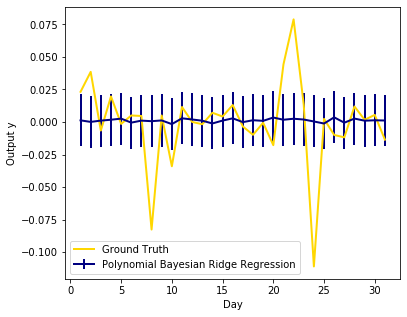

In [51]:
import matplotlib.pyplot as plt

lw =2 

plt.figure(figsize=(6, 5))

plt.errorbar(df.index[30::-1], train_preds[30::-1], train_stds[30::-1].values, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)

plt.plot(df.index[30::-1], y_train[30::-1], color='gold', linewidth=lw,
         label="Ground Truth")

plt.ylabel("Output y")
plt.xlabel("Day")
plt.legend(loc="lower left")
plt.show()

The current estimate does not predict much more than simply the mean. At this point, further work must be done including feature engineering and model tuning. 